## 逻辑回归中添加多项式特征

In [18]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(666)
X = np.random.normal(0, 1, size=(200, 2))
y = np.array((X[:,0]**2+X[:,1]**2)<1.5, dtype='int')
print(X)
print(y)

[[ 0.82418808  0.479966  ]
 [ 1.17346801  0.90904807]
 [-0.57172145 -0.10949727]
 [ 0.01902826 -0.94376106]
 [ 0.64057315 -0.78644317]
 [ 0.60886999 -0.93101185]
 [ 0.97822225 -0.73691806]
 [-0.29873262 -0.46058737]
 [-1.08879299 -0.57577075]
 [-1.68290077  0.22918525]
 [-1.75662522  0.84463262]
 [ 0.27721986  0.85290153]
 [ 0.1945996   1.31063772]
 [ 1.5438436  -0.52904802]
 [-0.6564723  -0.2015057 ]
 [-0.70061583  0.68713795]
 [-0.02607576 -0.82975832]
 [ 0.29655378 -0.3126795 ]
 [-0.61130127 -0.8217515 ]
 [ 0.8971227   0.13607861]
 [-0.2586548   1.11076564]
 [-0.18842439 -0.04148929]
 [-0.98479191 -1.35228176]
 [ 0.19432385  0.26723935]
 [-0.4264737   1.44773506]
 [-0.1963061   1.51814514]
 [ 0.07722188 -0.06399132]
 [ 0.94592341  1.20409101]
 [-0.45124074 -1.58744651]
 [-1.86885548  0.10037737]
 [-3.09487059  3.39351678]
 [-0.12666878 -0.93713026]
 [ 0.56552529  0.3158975 ]
 [-0.79572225  0.50507572]
 [ 0.32482413  0.9608153 ]
 [ 0.03026866  0.57605275]
 [-0.06992037  0.64549479]
 

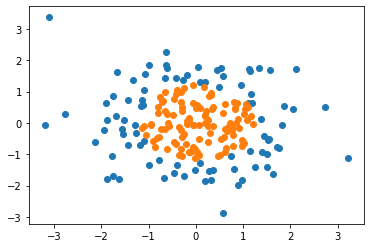

In [2]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

### 使用逻辑回归

In [3]:
from playML.LogisticRegression import LogisticRegression

In [4]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

In [5]:
log_reg.score(X, y)

0.605

In [6]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

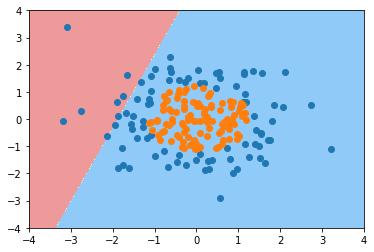

In [7]:
# 如果只是直线分类可以发现错误分类太明显了
plot_decision_boundary(log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# 这里使用的LogisticRegression是自己封装的
# 只要封装的LogisticRegression是符合sklearn标准的，就能放入pipeline
def PolynomialLogisticRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression())
    ])

In [9]:
poly_log_reg = PolynomialLogisticRegression(degree=2)
poly_log_reg.fit(X, y)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('log_reg', LogisticRegression())],
         verbose=False)

In [10]:
poly_log_reg.score(X, y)

0.95

In [17]:
print(poly_log_reg['log_reg'].coef_)
print(poly_log_reg['log_reg'].intercept_)

[ 0.          0.32090981 -0.10341635 -4.05544231 -0.04523093 -3.66787798]
-0.703648930169744


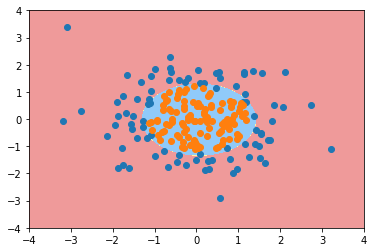

In [11]:
plot_decision_boundary(poly_log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [12]:
poly_log_reg2 = PolynomialLogisticRegression(degree=20)
poly_log_reg2.fit(X, y)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=20, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('log_reg', LogisticRegression())],
         verbose=False)

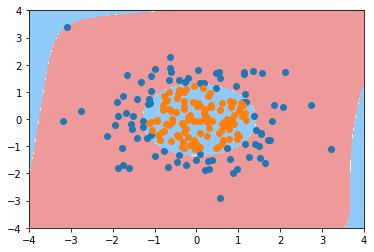

In [13]:
# degree的值过大，导致边界比较奇怪，出现过拟合
plot_decision_boundary(poly_log_reg2, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()